In [1]:
import numpy as np

In [1]:
text = 'You say goodbye and I say hello.'

In [2]:
text = text.lower()

In [3]:
text

'you say goodbye and i say hello.'

In [4]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello.']

In [5]:
word_to_id = {}
id_to_word = {}

In [6]:
for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

In [7]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello.'}

In [8]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello.': 5}

In [11]:
import numpy as np

In [10]:
corpus = [word_to_id[w] for w in words]

In [12]:
corpus = np.array(corpus)

In [13]:
corpus

array([0, 1, 2, 3, 4, 1, 5])

In [14]:
import sys

In [15]:
sys.path.append('..')

In [40]:
from common.util import preprocess, create_co_matrix, cos_similarity, most_similar, ppmi

In [20]:
corpus, word_to_id, id_to_word =preprocess(text)

In [33]:
C = create_co_matrix(corpus, len(corpus), 1)

In [34]:
c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]
print(cos_similarity(c0, c1))

0.7071067691154799


In [36]:
most_similar('you', word_to_id, id_to_word, C)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


In [37]:
x = np.array([100, -20, 2])

In [38]:
x.argsort()

array([1, 2, 0])

In [39]:
# C(x, y)

In [42]:
np.set_printoptions(precision=3)

In [44]:
W = ppmi(C)

# 特異値分解
$$
X = USV^T
$$

In [45]:
U, S, V = np.linalg.svd(W)

In [46]:
print(C[0])

[0 1 0 0 0 0 0 0]


In [47]:
print(W[0])

[0.    1.807 0.    0.    0.    0.    0.    0.   ]


In [48]:
print(U[0])

[ 3.409e-01  0.000e+00 -1.205e-01 -3.886e-16 -9.323e-01 -1.110e-16
 -2.426e-17  0.000e+00]


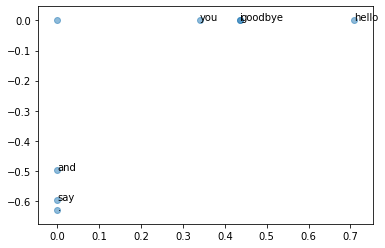

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
    
plt.scatter(U[:, 0], U[:, 1], alpha=0.5)
plt.show()

In [3]:
c = np.array([1,0,0,0,0,0,0])
W = np.random.randn(7, 3)
h = np.dot(c, W)
print(h)

[0.05581309 0.42541579 0.77415076]


In [5]:
W

array([[ 0.05581309,  0.42541579,  0.77415076],
       [ 0.69116357,  0.23255897, -2.43055727],
       [-1.23429135, -0.98852063,  0.62306278],
       [ 0.43280299,  1.43876903,  0.60739283],
       [-0.42830557,  0.60809509, -1.23250322],
       [-0.07399012, -1.73793111, -0.76352243],
       [ 0.13529117, -0.30182684,  0.17834817]])

In [6]:
import sys
sys.path.append('..')
from common.layers import MatMul

In [7]:
layer = MatMul(W)

In [9]:
h = layer.forward(c)
print(h)

[0.05581309 0.42541579 0.77415076]


In [14]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss

In [13]:
c0 = np.array([[1,0,0,0,0,0,0]])
c1 = np.array([[0,0,1,0,0,0,0]])

W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)
l = SoftmaxWithLoss(s)

[[ 0.80350138 -0.4250454  -0.97021973 -0.08738306 -0.24375869 -0.92907603
   0.07939626]]


In [28]:
from common.util import preprocess, create_contexts_target, convert_one_hot

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [29]:
contexts, target = create_contexts_target(corpus, 1)    
vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

In [31]:
contexts

array([[[1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1]]], dtype=int32)